In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [2]:
d2 = pd.read_csv(r"D:\datascience\Singapore_resale_price_project\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
d1 = pd.read_csv(r"D:\datascience\Singapore_resale_price_project\ResaleFlatPricesBasedonApprovalDate19901999.csv")
d4 = pd.read_csv(r"D:\datascience\Singapore_resale_price_project\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
d5 = pd.read_csv(r"D:\datascience\Singapore_resale_price_project\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
d3 = pd.read_csv(r"D:\datascience\Singapore_resale_price_project\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

In [3]:
d4

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [4]:
d5.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [5]:
df = pd.concat((d1, d2, d3, d4, d5), axis = 0)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
172577,2024-02,YISHUN,5 ROOM,513D,YISHUN ST 51,04 TO 06,113.0,Improved,2018,708000.0,93 years 01 month
172578,2024-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,Maisonette,1988,860000.0,63 years 10 months
172579,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0,62 years 11 months
172580,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62 years 10 months


In [6]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [7]:
df1 = df.dropna()
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64
...,...,...,...,...,...,...,...,...,...,...,...
172577,2024-02,YISHUN,5 ROOM,513D,YISHUN ST 51,04 TO 06,113.0,Improved,2018,708000.0,93 years 01 month
172578,2024-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,Maisonette,1988,860000.0,63 years 10 months
172579,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0,62 years 11 months
172580,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62 years 10 months


In [8]:
df1.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [9]:
df1['remaining_lease_year'] = 99-(2024- df1['lease_commence_date'])
df1 = df1.drop('remaining_lease' , axis = 1, inplace= False)

df1['flat_type'] = df1['flat_type'].replace('MULTI GENERATION', 'MULTI-GENERATION')

df1['flat_model'] = df1['flat_model'].replace('IMPROVED', 'Improved')
df1['flat_model'] = df1['flat_model'].replace('IMPROVED-MAISONETTE', 'Improved-Maisonette')
df1['flat_model'] = df1['flat_model'].replace('2-ROOM', '2-room')
df1['flat_model'] = df1['flat_model'].replace('PREMIUM APARTMENT', 'Premium Apartment')
df1['flat_model'] = df1['flat_model'].replace('MAISONETTE', 'Maisonette')
df1['flat_model'] = df1['flat_model'].replace('MODEL A-MAISONETTE', 'Model A-Maisonette')
df1['flat_model'] = df1['flat_model'].replace('MODEL A', 'Model A')
df1['flat_model'] = df1['flat_model'].replace('NEW GENERATION', 'New Generation')
df1['flat_model'] = df1['flat_model'].replace('STANDARD', 'Standard')
df1['flat_model'] = df1['flat_model'].replace('APARTMENT', 'Apartment')
df1['flat_model'] = df1['flat_model'].replace('MULTI GENERATION', 'Multi Generation')
df1['flat_model'] = df1['flat_model'].replace('SIMPLIFIED', 'Simplified')

In [10]:
df1['flat_type'].unique()
df1['flat_model'].unique()
df1['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [11]:
df1['flat_type_enc'] = OrdinalEncoder().fit_transform(df1[['flat_type']])

df1['flat_model_enc'] = OrdinalEncoder().fit_transform(df1[['flat_model']])

df1['town_enc'] = OrdinalEncoder().fit_transform(df1[['town']])

In [12]:
df1['flat_type_enc'].unique()
df1['flat_model_enc'].unique()
df1['town_enc'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [13]:
def median_val(val):
    k = [float(i) for i in val.split("TO")]
    m = statistics.median(k)
    return m

df1['story_range_med'] = df1['storey_range'].apply(median_val)

In [14]:
df1.isnull().sum()

month                   0
town                    0
flat_type               0
block                   0
street_name             0
storey_range            0
floor_area_sqm          0
flat_model              0
lease_commence_date     0
resale_price            0
remaining_lease_year    0
flat_type_enc           0
flat_model_enc          0
town_enc                0
story_range_med         0
dtype: int64

In [15]:
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,flat_type_enc,flat_model_enc,town_enc,story_range_med
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,61,2.0,5.0,0.0,8.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,56,2.0,12.0,0.0,2.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,55,2.0,12.0,0.0,2.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,54,2.0,12.0,0.0,2.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,55,2.0,12.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172577,2024-02,YISHUN,5 ROOM,513D,YISHUN ST 51,04 TO 06,113.0,Improved,2018,708000.0,93,4.0,5.0,25.0,5.0
172578,2024-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,Maisonette,1988,860000.0,63,5.0,7.0,25.0,5.0
172579,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0,62,5.0,3.0,25.0,11.0
172580,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62,5.0,7.0,25.0,8.0


In [16]:
df1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease_year', 'flat_type_enc', 'flat_model_enc', 'town_enc',
       'story_range_med'],
      dtype='object')

In [17]:
columns = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'remaining_lease_year']

In [18]:
df2 = df1.drop_duplicates()

In [19]:
df2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,flat_type_enc,flat_model_enc,town_enc,story_range_med
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,61,2.0,5.0,0.0,8.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,56,2.0,12.0,0.0,2.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,55,2.0,12.0,0.0,2.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,54,2.0,12.0,0.0,2.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,55,2.0,12.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172577,2024-02,YISHUN,5 ROOM,513D,YISHUN ST 51,04 TO 06,113.0,Improved,2018,708000.0,93,4.0,5.0,25.0,5.0
172578,2024-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,Maisonette,1988,860000.0,63,5.0,7.0,25.0,5.0
172579,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0,62,5.0,3.0,25.0,11.0
172580,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62,5.0,7.0,25.0,8.0


In [20]:
df.to_csv(r"D:\datascience\Singapore_resale_price_project\data.csv")

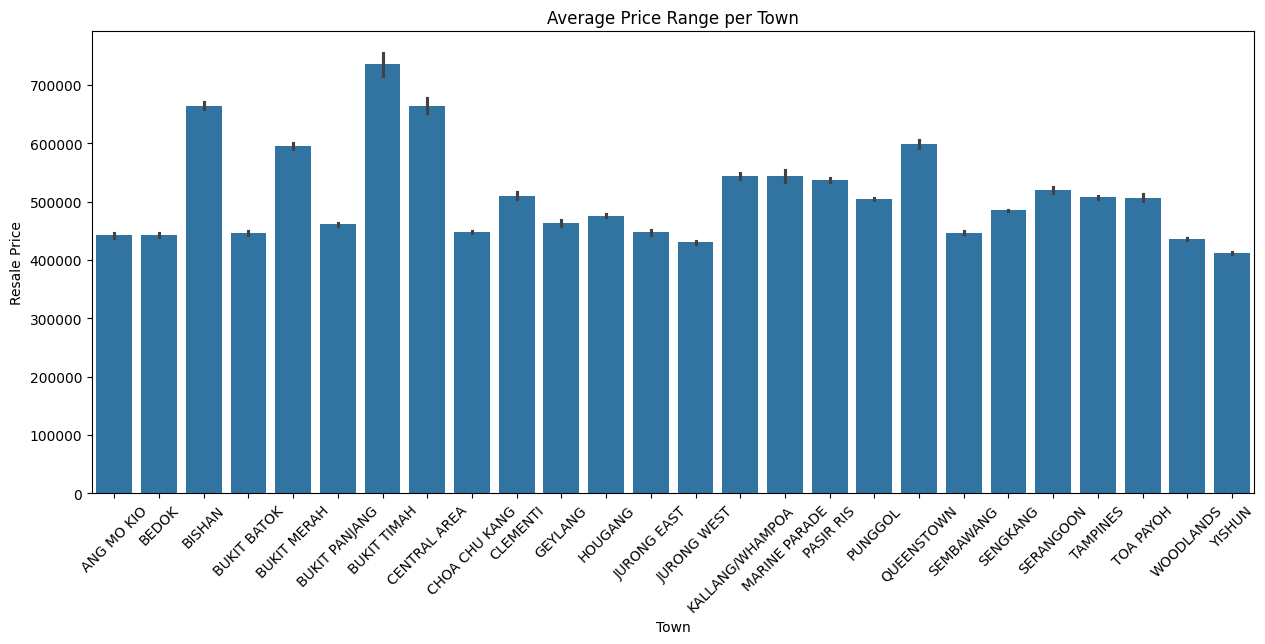

In [21]:
plt.figure(figsize= (15,6))
sns.barplot(x = 'town', y = 'resale_price', data = df2)
plt.title('Average Price Range per Town')
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.xticks(rotation = 45)
plt.show()

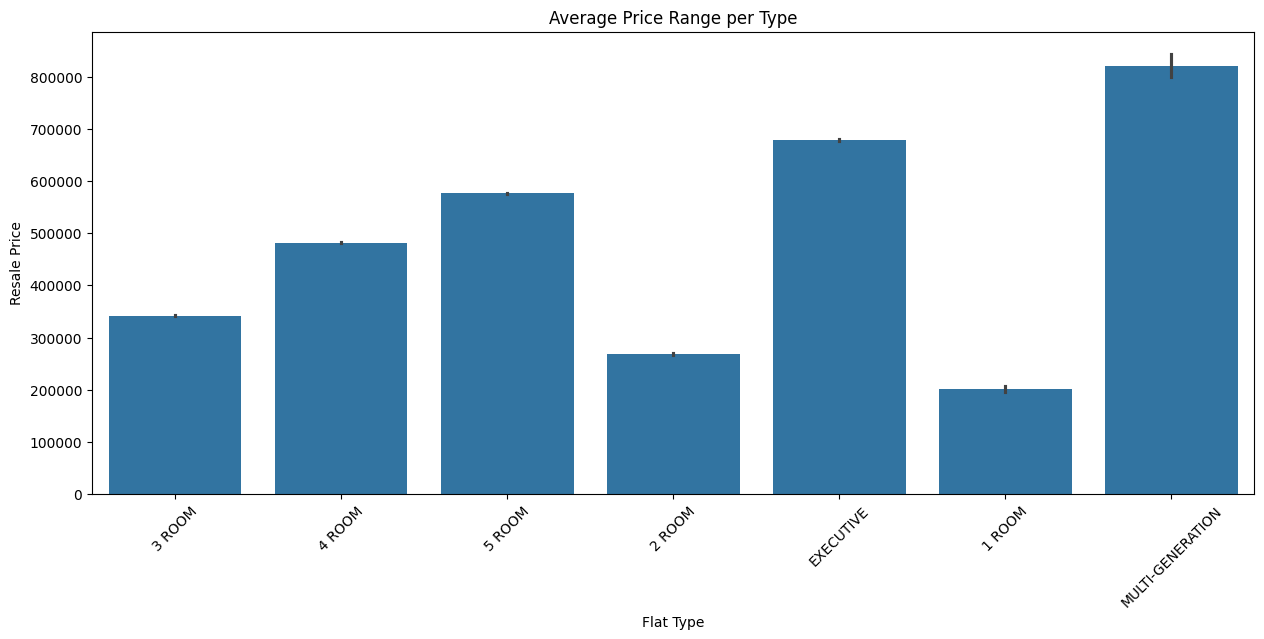

In [22]:
plt.figure(figsize= (15,6))
sns.barplot(x = 'flat_type', y = 'resale_price', data = df2)
plt.title('Average Price Range per Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.xticks(rotation = 45)
plt.show()

In [23]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,209359.0,97.216156,24.059098,31.0,82.0,94.0,112.0,280.0
lease_commence_date,209359.0,1995.023242,13.603690,1966.0,1984.0,1995.0,2004.0,2022.0
resale_price,209359.0,483050.653026,166470.850155,140000.0,360000.0,450000.0,572000.0,1568888.0
remaining_lease_year,209359.0,70.023242,13.603690,41.0,59.0,70.0,79.0,97.0
flat_type_enc,209359.0,3.123687,0.919007,0.0,2.0,3.0,4.0,6.0
flat_model_enc,209359.0,8.697243,3.653927,0.0,5.0,8.0,12.0,20.0
town_enc,209359.0,13.894674,7.958035,0.0,8.0,14.0,21.0,25.0
story_range_med,209359.0,8.659628,5.849146,2.0,5.0,8.0,11.0,50.0


In [24]:
a = df2[df2['flat_type'] == '3 ROOM']['resale_price']
a.mean()

341955.02041165094

In [25]:
def plot(df, columns):
    for i in columns:
        plt.figure(figsize=(20,5))
        
        plt.subplot(1,3,1)
        sns.boxplot(df[i])
        plt.title(f'Box Plot for {i}')

        plt.subplot(1,3,2)
        sns.histplot(df[i], kde=True, bins=50)
        plt.title(f'Distribution Plot for {i}')

        plt.subplot(1,3,3)
        sns.violinplot(df[i])
        plt.title(f'Violin Plot for {i}')
        
        plt.show()

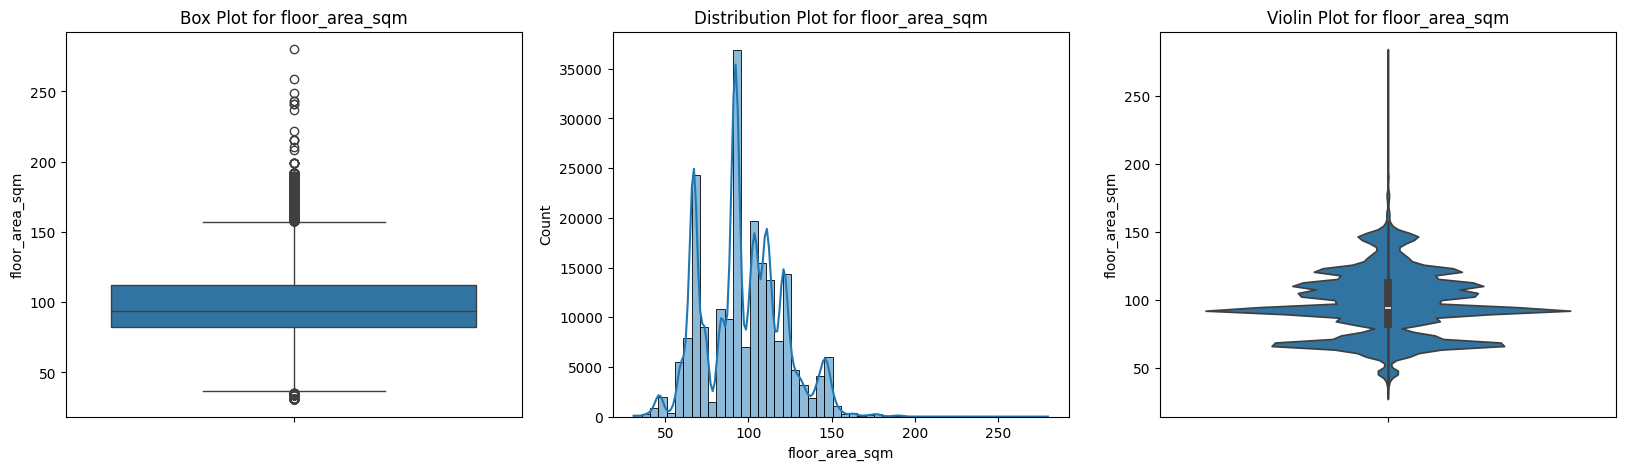

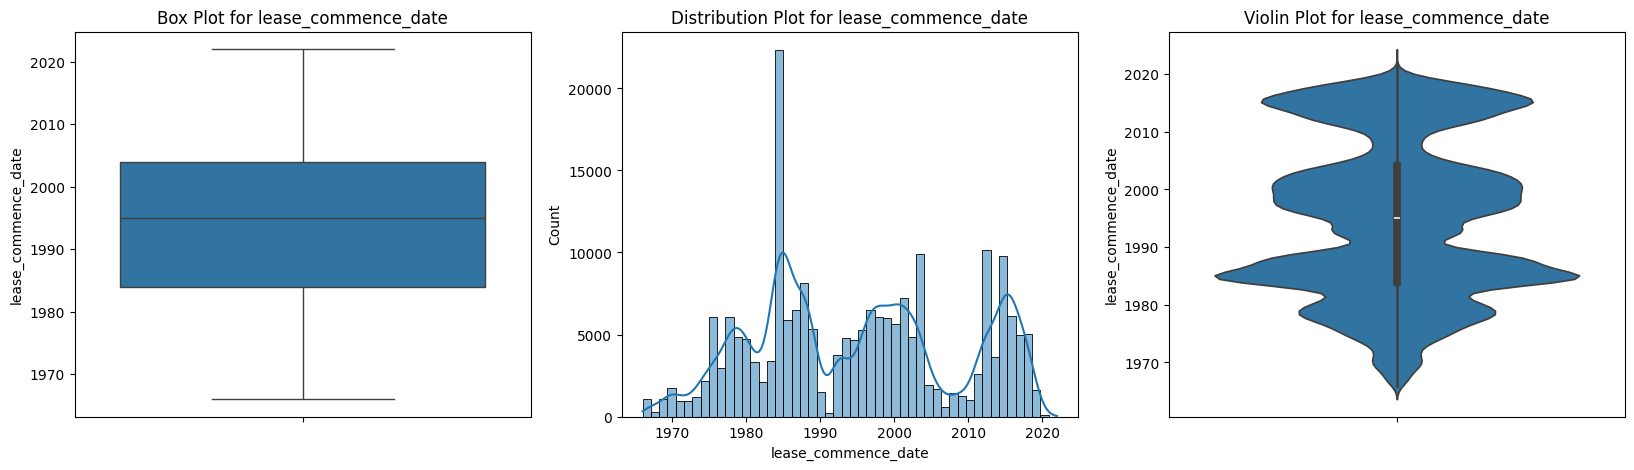

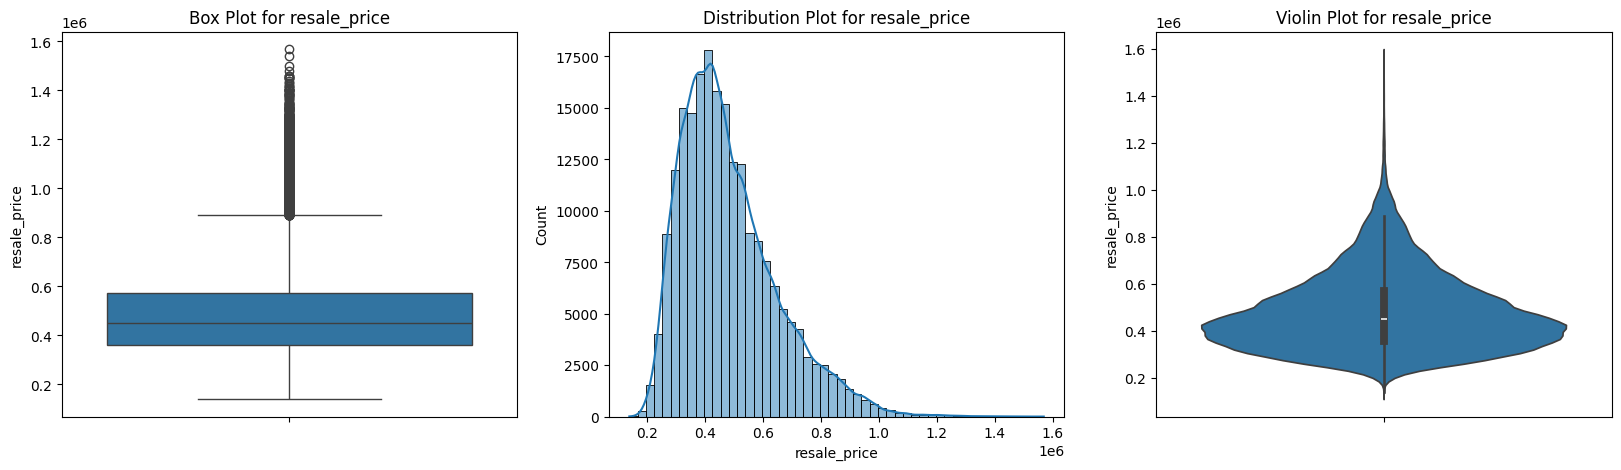

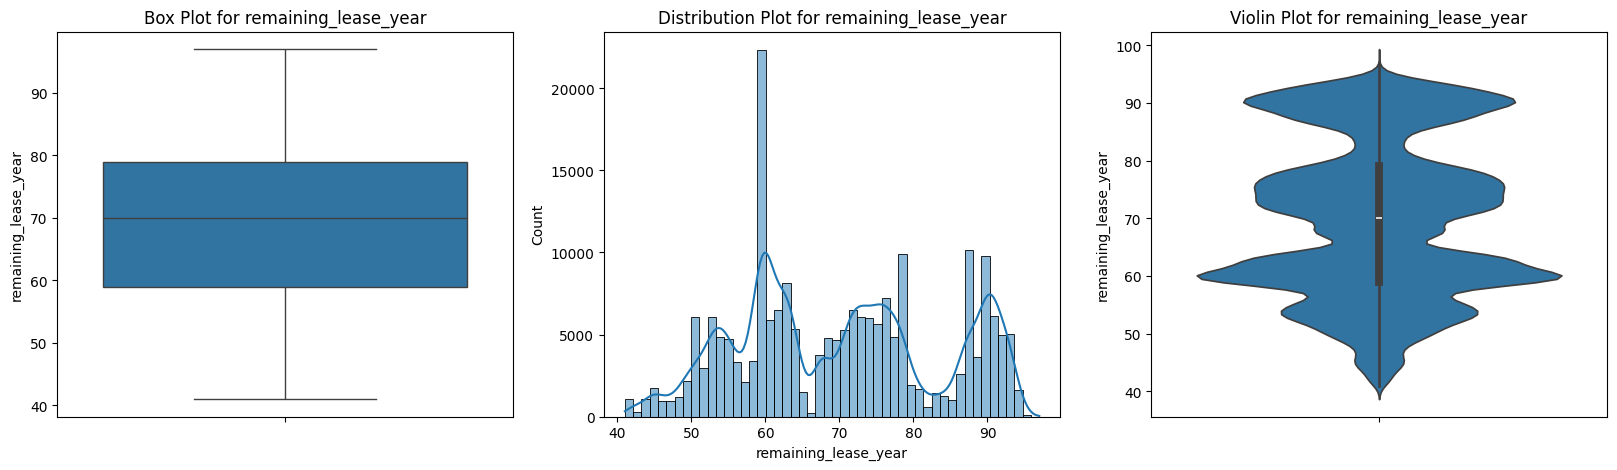

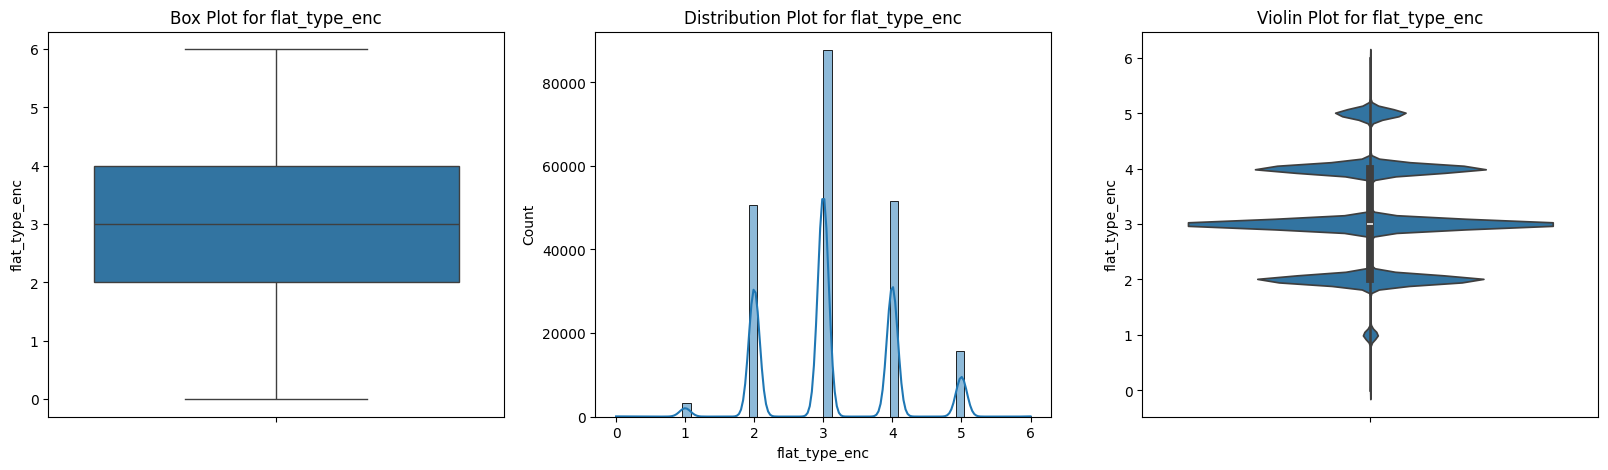

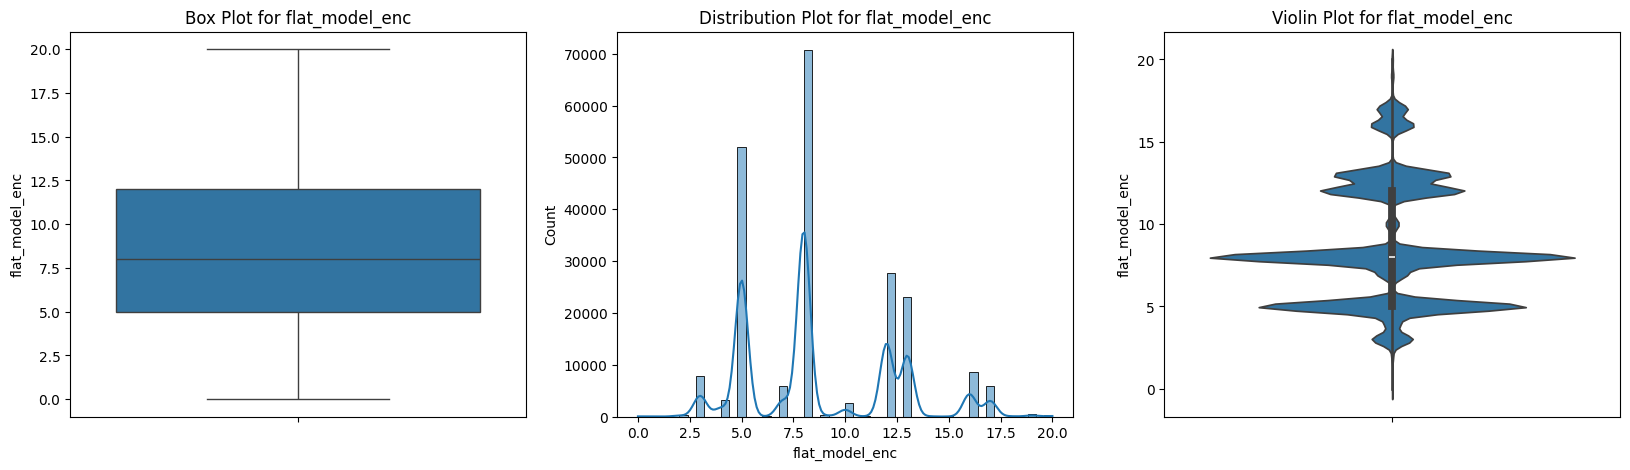

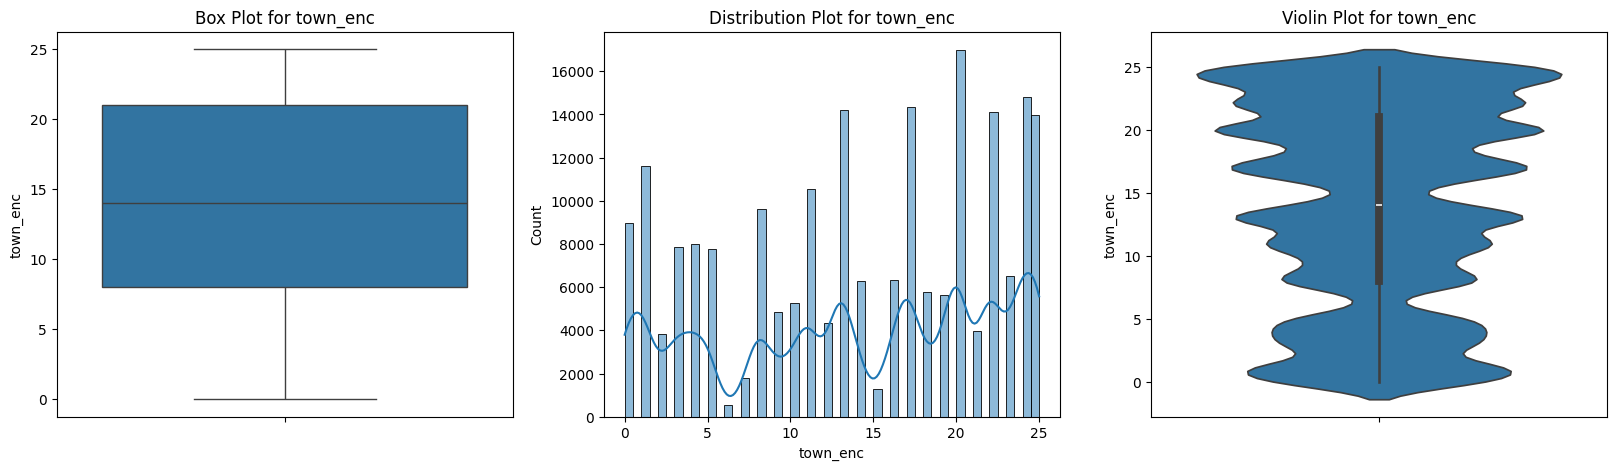

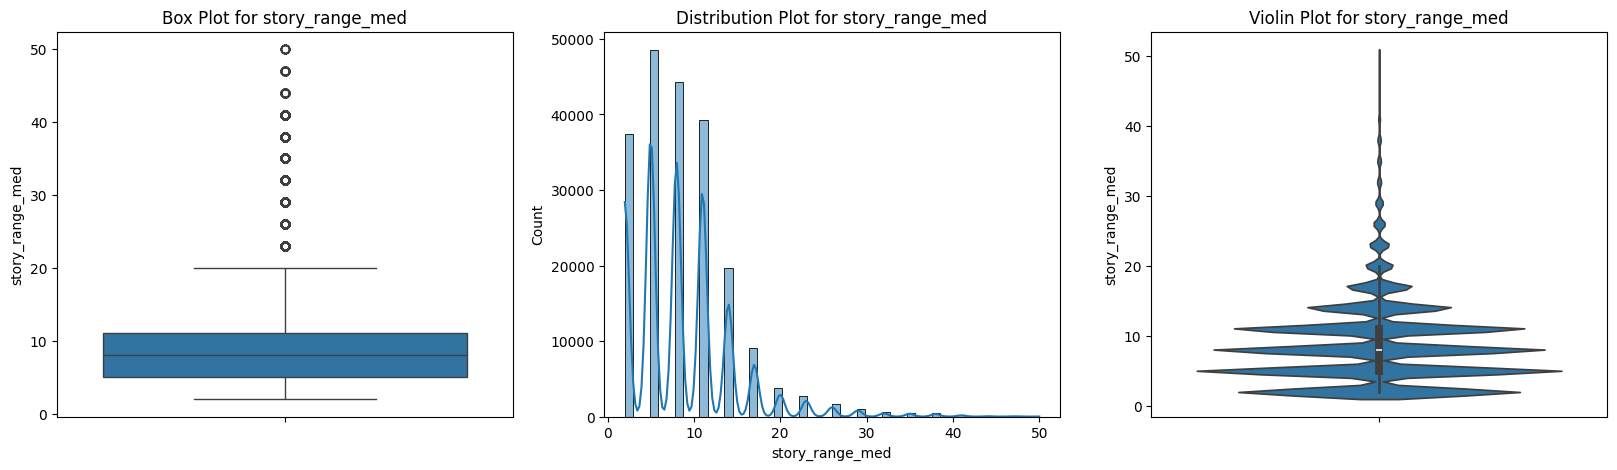

In [26]:
columns = ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'remaining_lease_year', 'flat_type_enc', 'flat_model_enc', 'town_enc', 'story_range_med']
plot(df2, columns)

In [27]:
df3 = df2.copy()

df3['story_range_log'] = np.log(df3['story_range_med'])
df3['remaining_lease_log'] = np.log(df3['remaining_lease_year'])
df3['resale_price_log'] = np.log(df3['resale_price'])
df3['lease_commence_date_log'] = np.log(df3['lease_commence_date'])
df3['floor_area_log'] = np.log(df3['floor_area_sqm'])

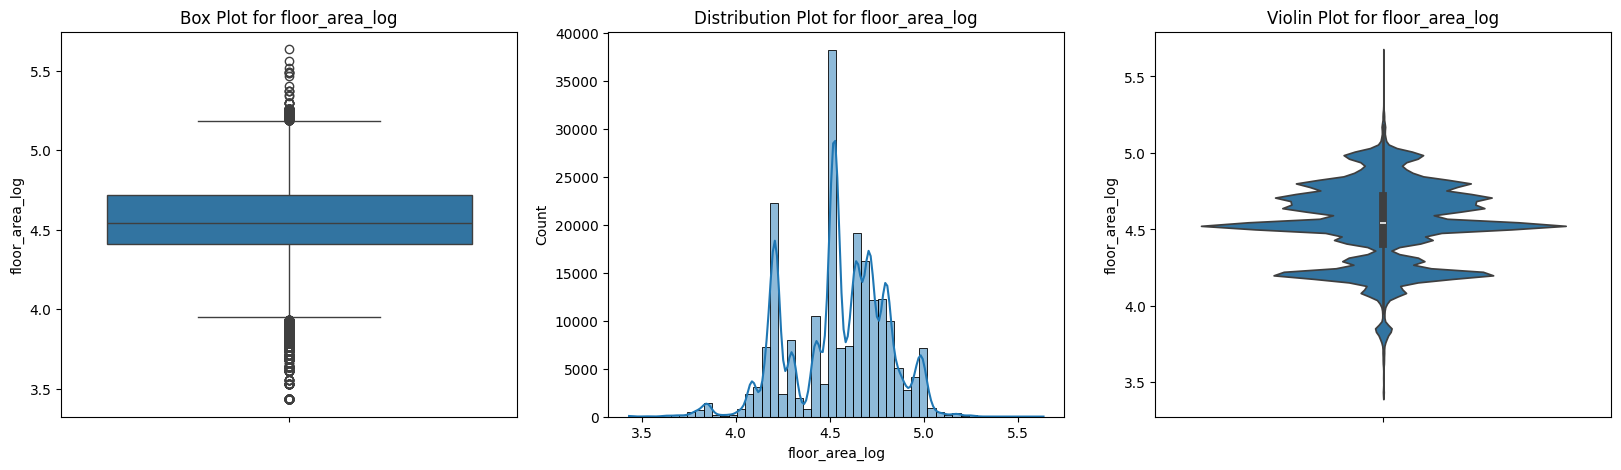

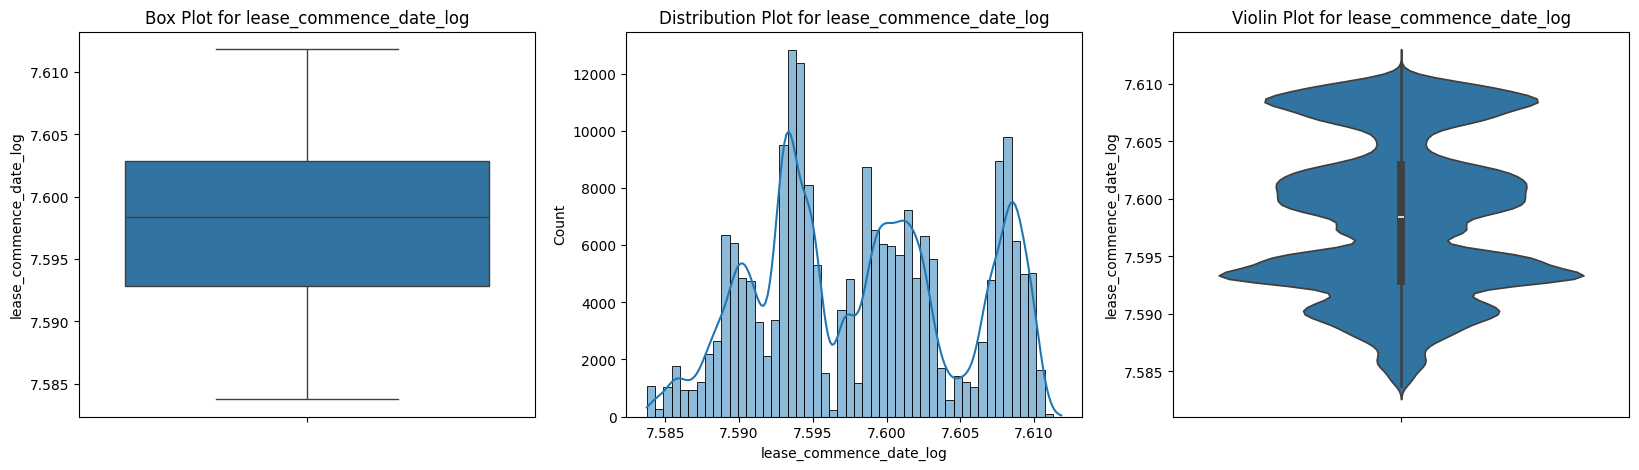

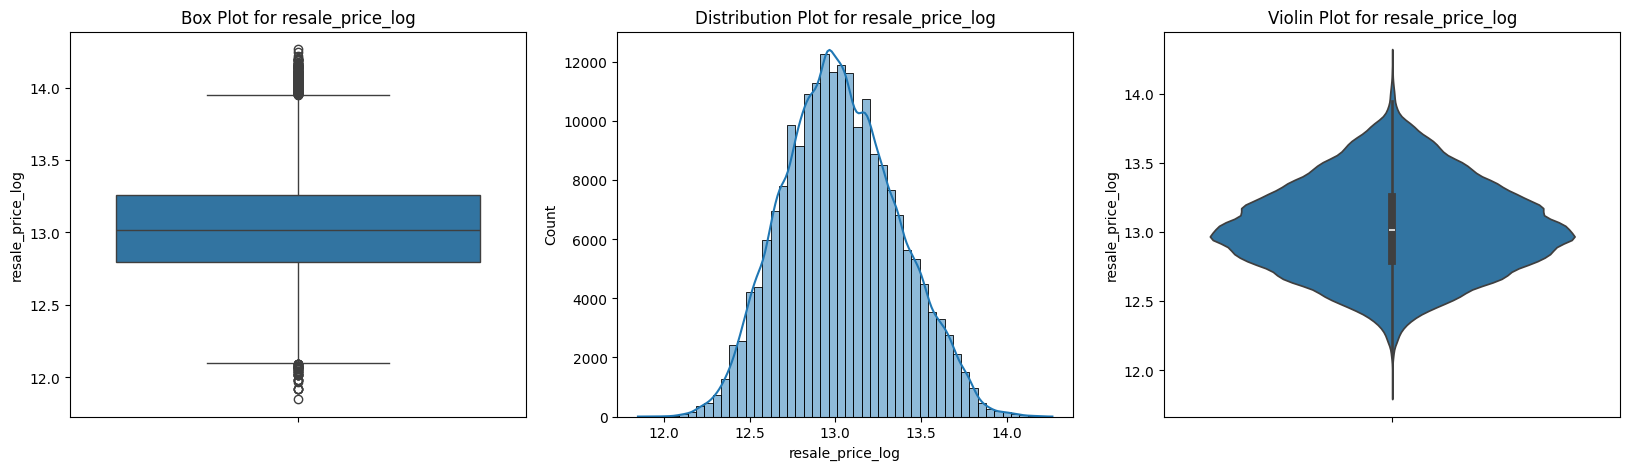

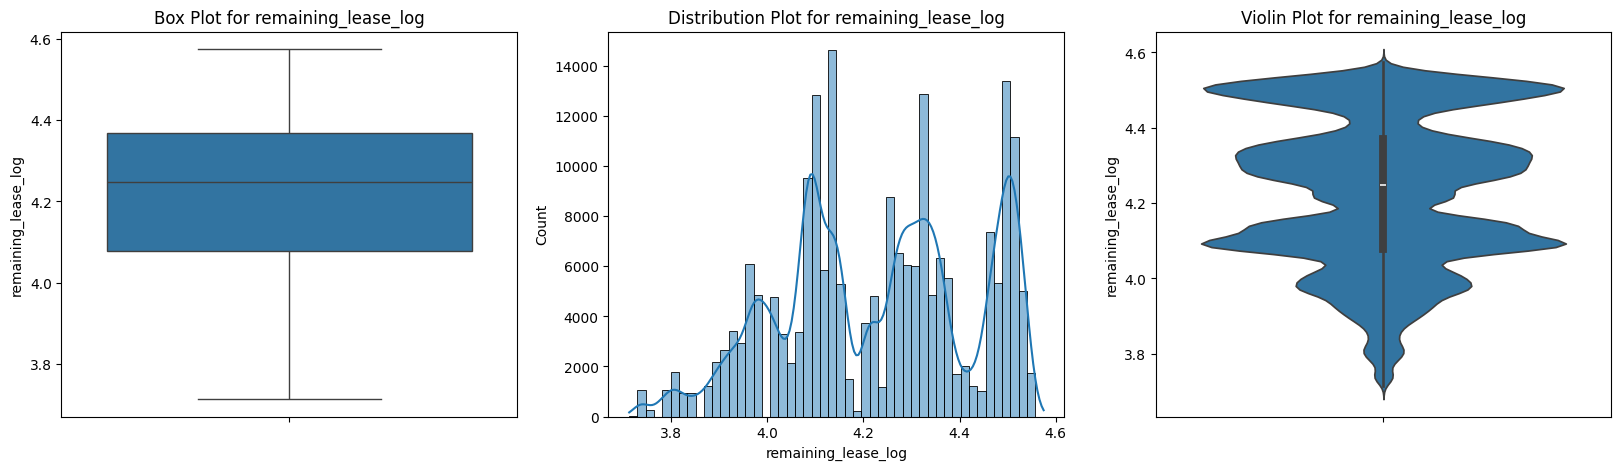

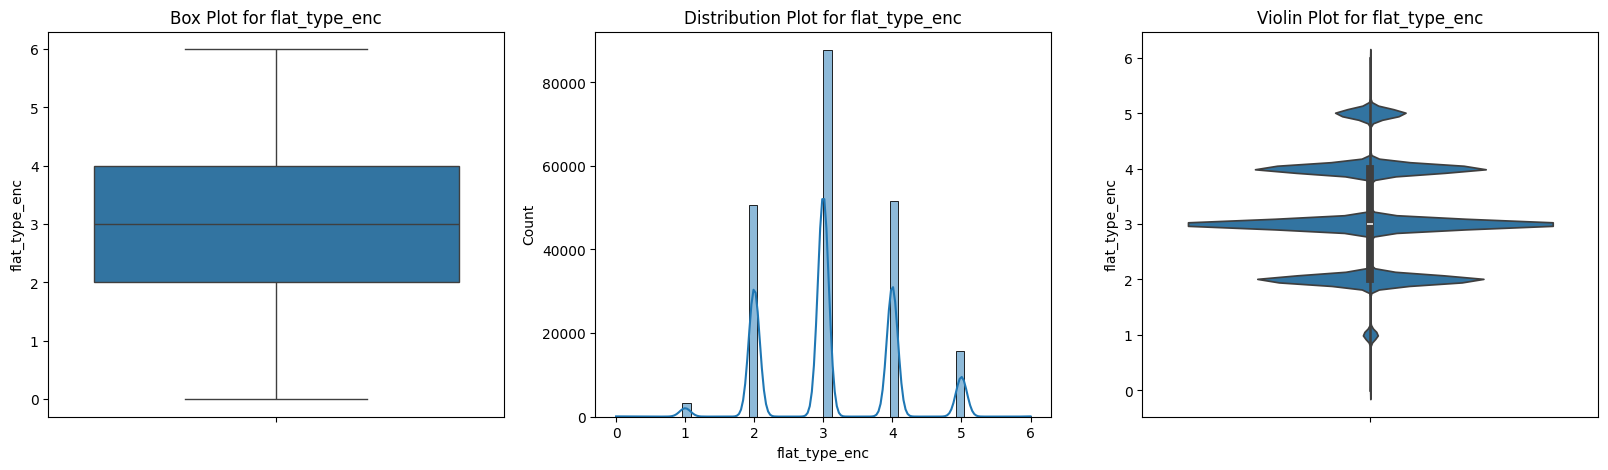

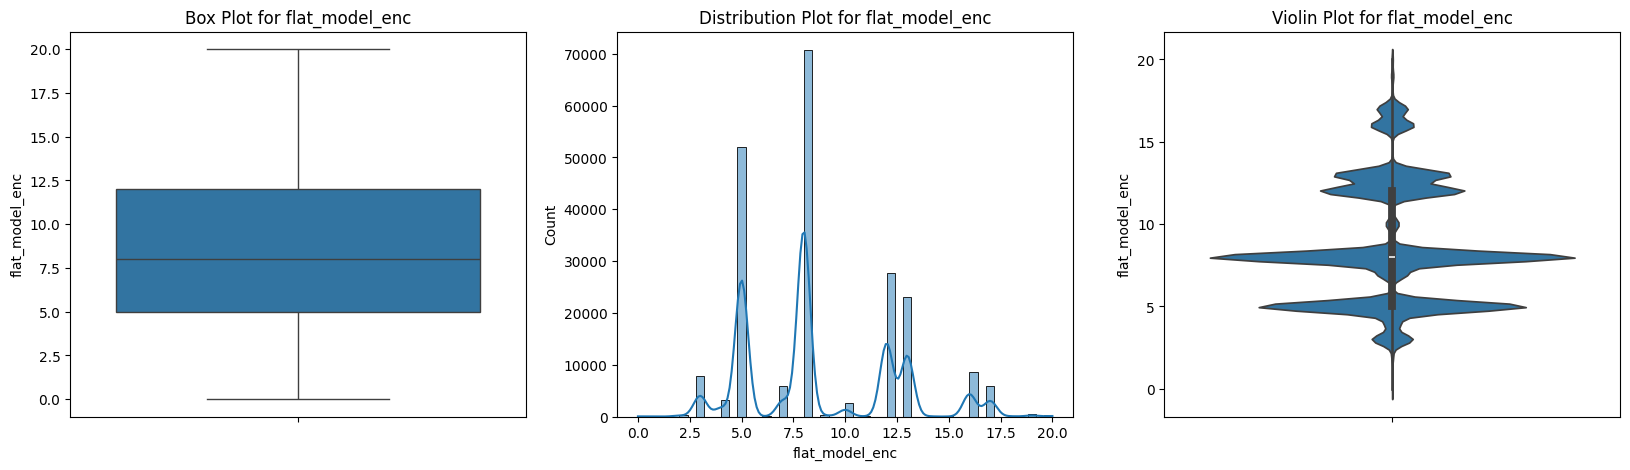

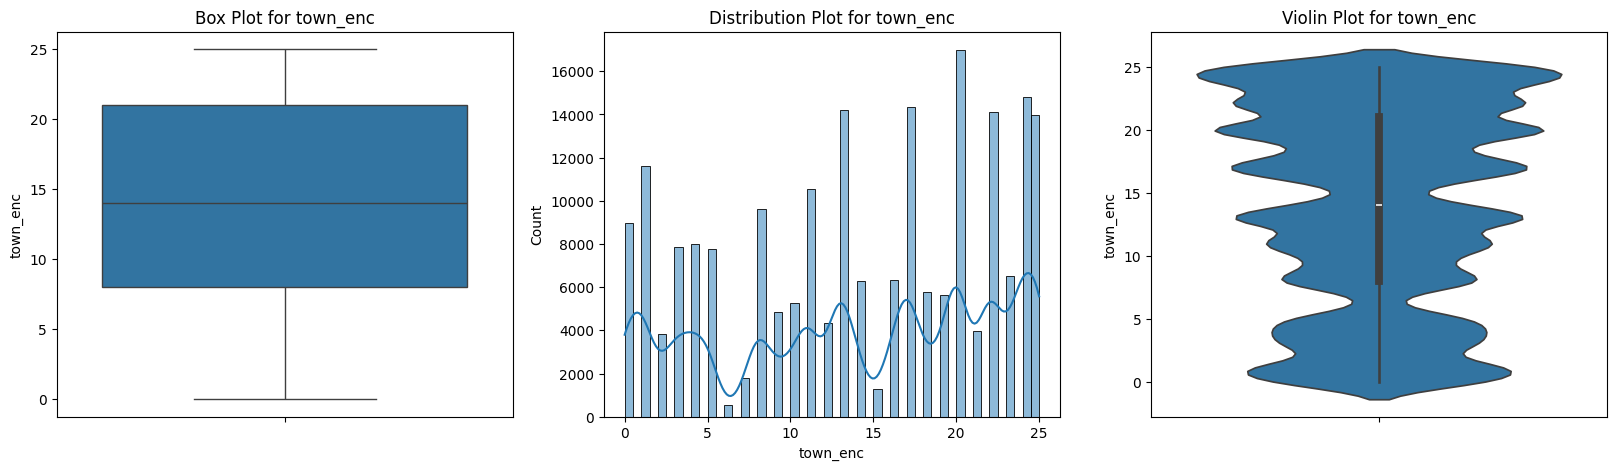

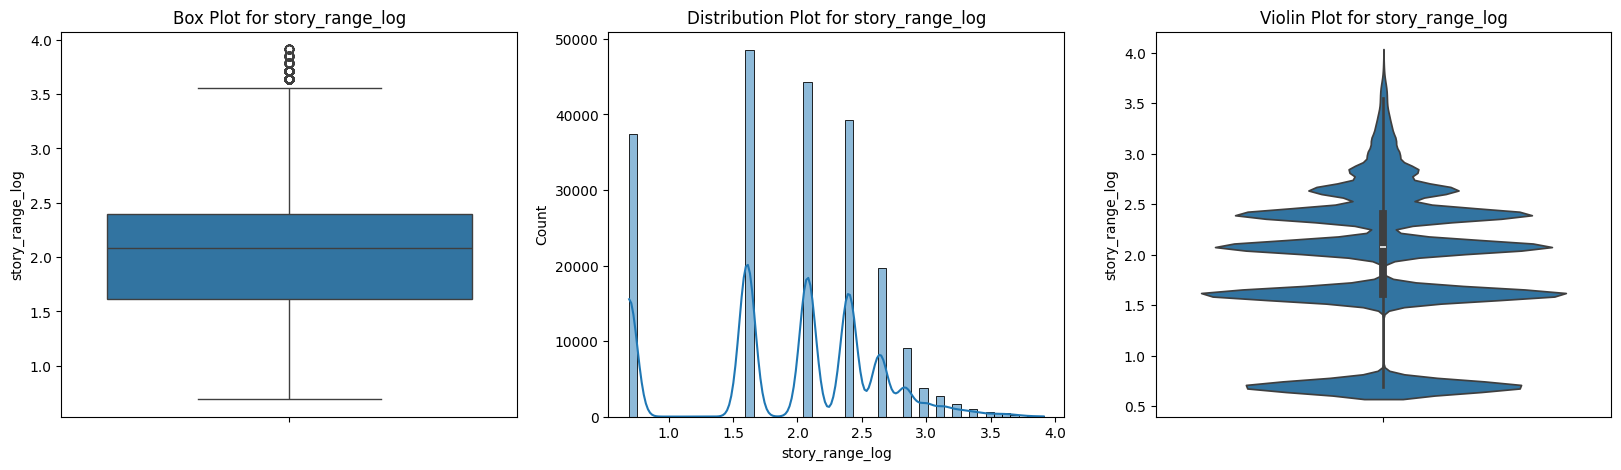

In [28]:
columns = ['floor_area_log', 'lease_commence_date_log', 'resale_price_log', 'remaining_lease_log', 'flat_type_enc', 'flat_model_enc', 'town_enc', 'story_range_log']
plot(df3, columns)

In [29]:
z_scores = df3.select_dtypes(include=np.number).apply(lambda x: np.abs((x - x.mean()) / x.std()))

threshold = 3

df4 = df3[(z_scores < threshold).all(axis=1)]

df4

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,flat_type_enc,flat_model_enc,town_enc,story_range_med,story_range_log,remaining_lease_log,resale_price_log,lease_commence_date_log,floor_area_log
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,61,2.0,5.0,0.0,8.0,2.079442,4.110874,12.449019,7.593878,4.094345
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,56,2.0,12.0,0.0,2.0,0.693147,4.025352,12.524526,7.591357,4.219508
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,55,2.0,12.0,0.0,2.0,0.693147,4.007333,12.560244,7.590852,4.234107
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,54,2.0,12.0,0.0,2.0,0.693147,3.988984,12.577636,7.590347,4.219508
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,55,2.0,12.0,0.0,8.0,2.079442,4.007333,12.577636,7.590852,4.219508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172576,2024-02,YISHUN,5 ROOM,502B,YISHUN ST 51,04 TO 06,112.0,Improved,2018,690000.0,93,4.0,5.0,25.0,5.0,1.609438,4.532599,13.444447,7.609862,4.718499
172577,2024-02,YISHUN,5 ROOM,513D,YISHUN ST 51,04 TO 06,113.0,Improved,2018,708000.0,93,4.0,5.0,25.0,5.0,1.609438,4.532599,13.470199,7.609862,4.727388
172578,2024-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,Maisonette,1988,860000.0,63,5.0,7.0,25.0,5.0,1.609438,4.143135,13.664688,7.594884,4.983607
172579,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0,62,5.0,3.0,25.0,11.0,2.397895,4.127134,13.586097,7.594381,4.955827


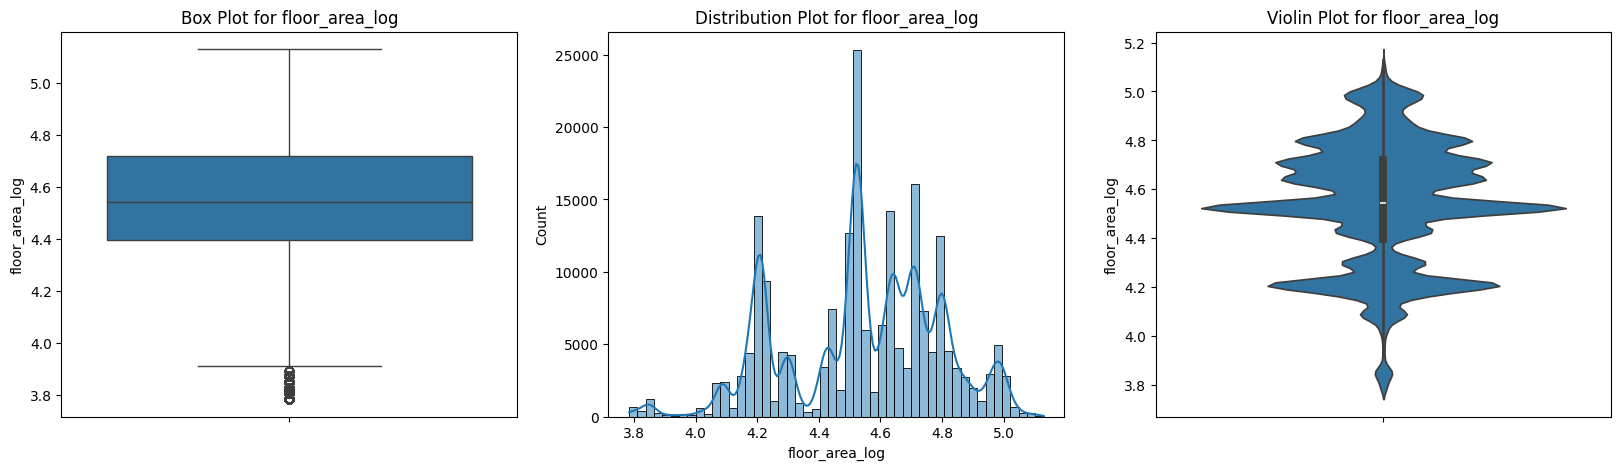

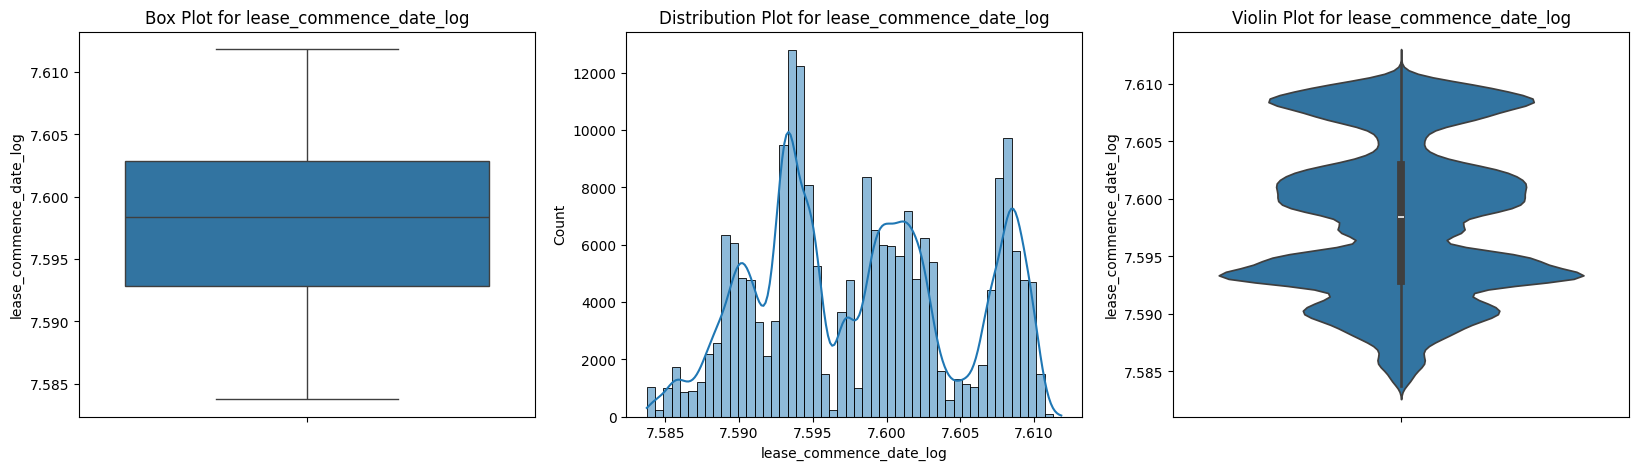

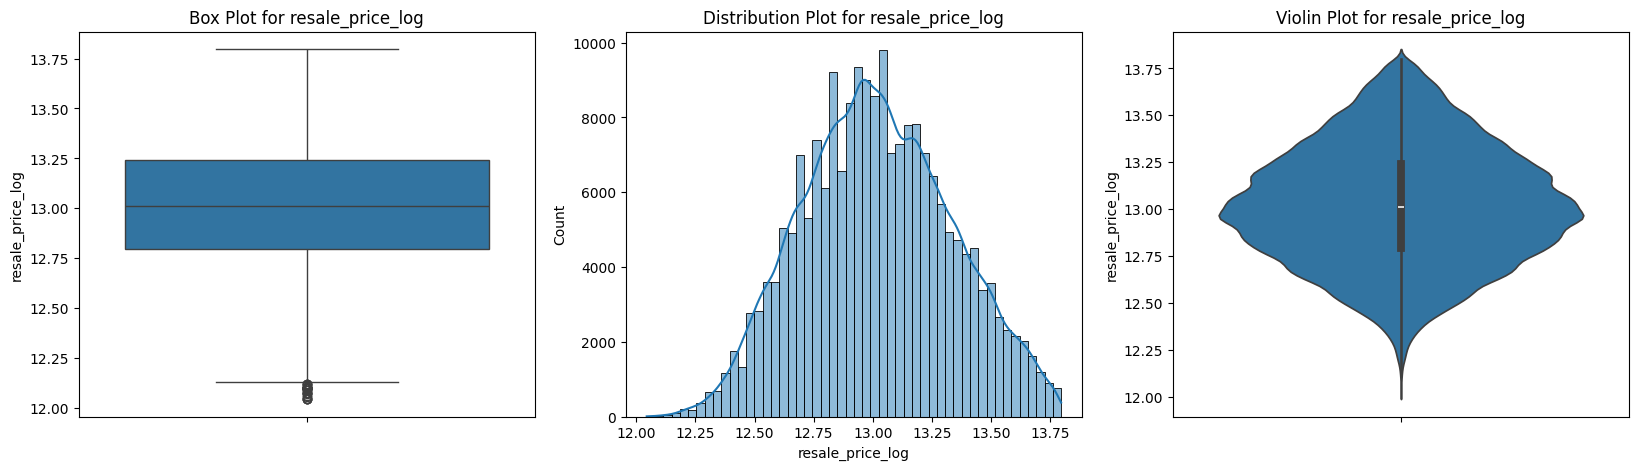

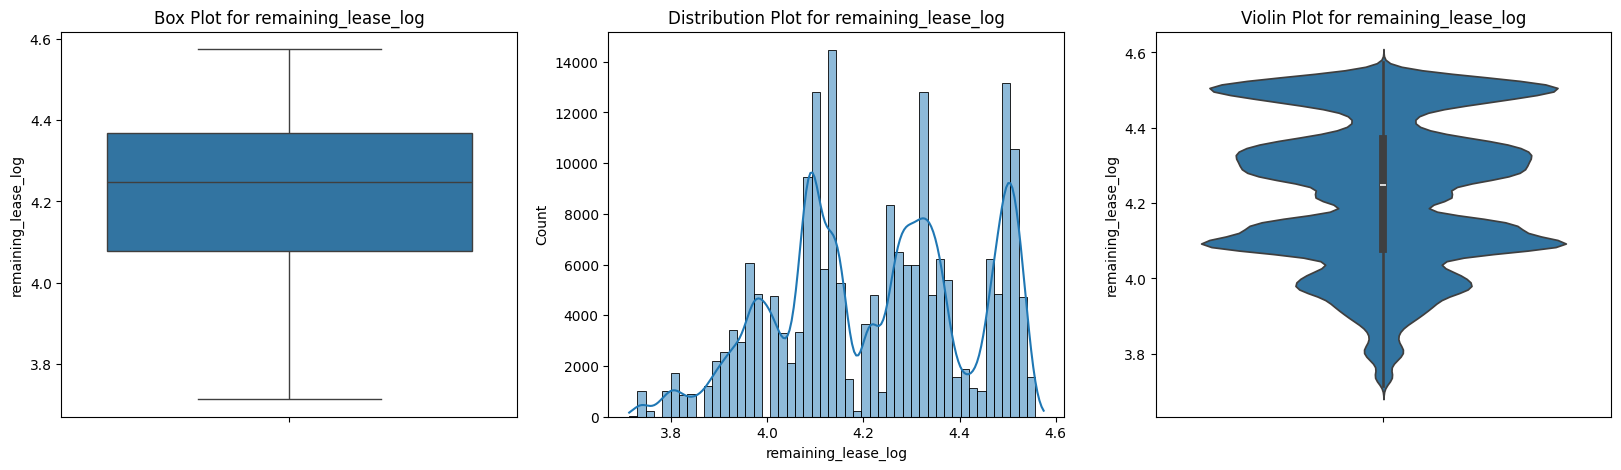

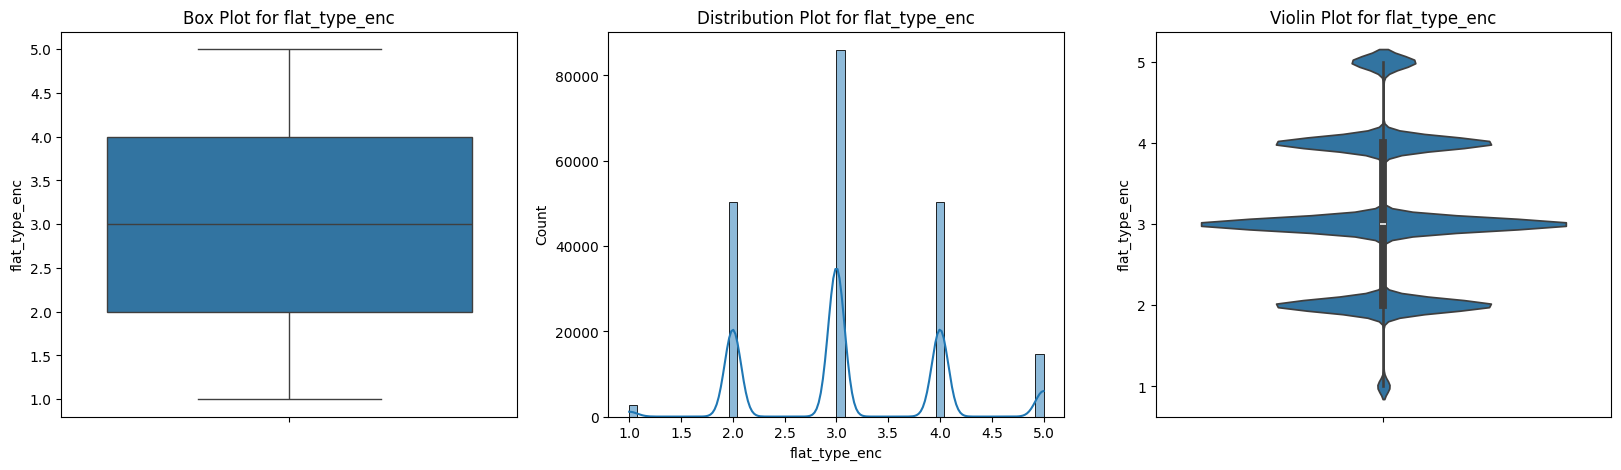

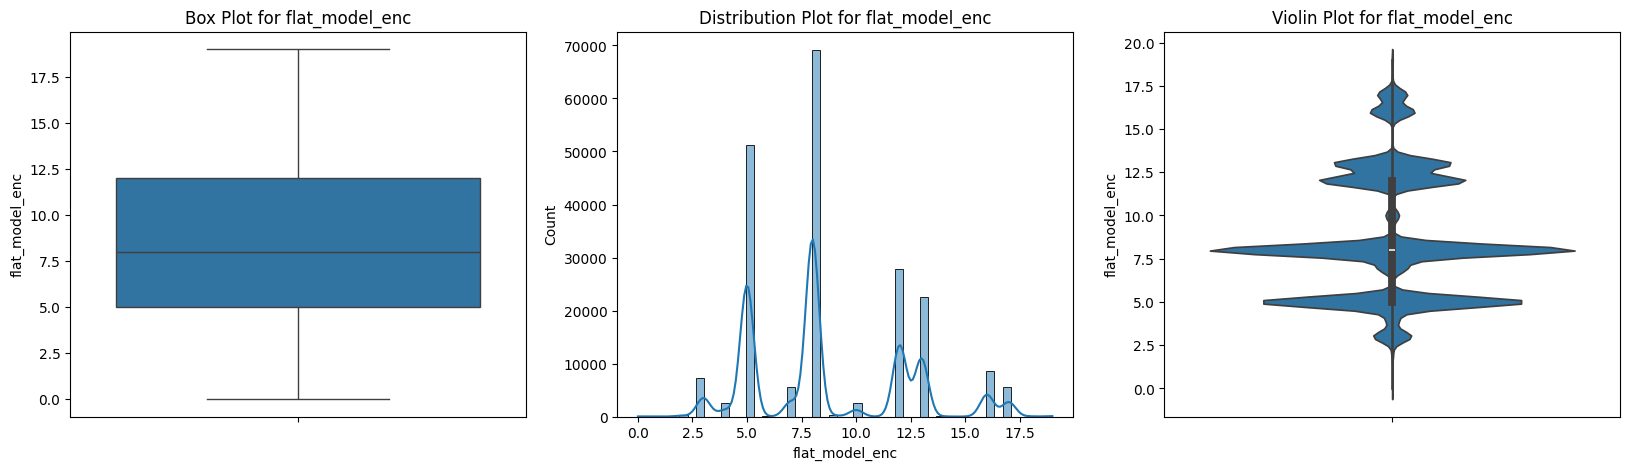

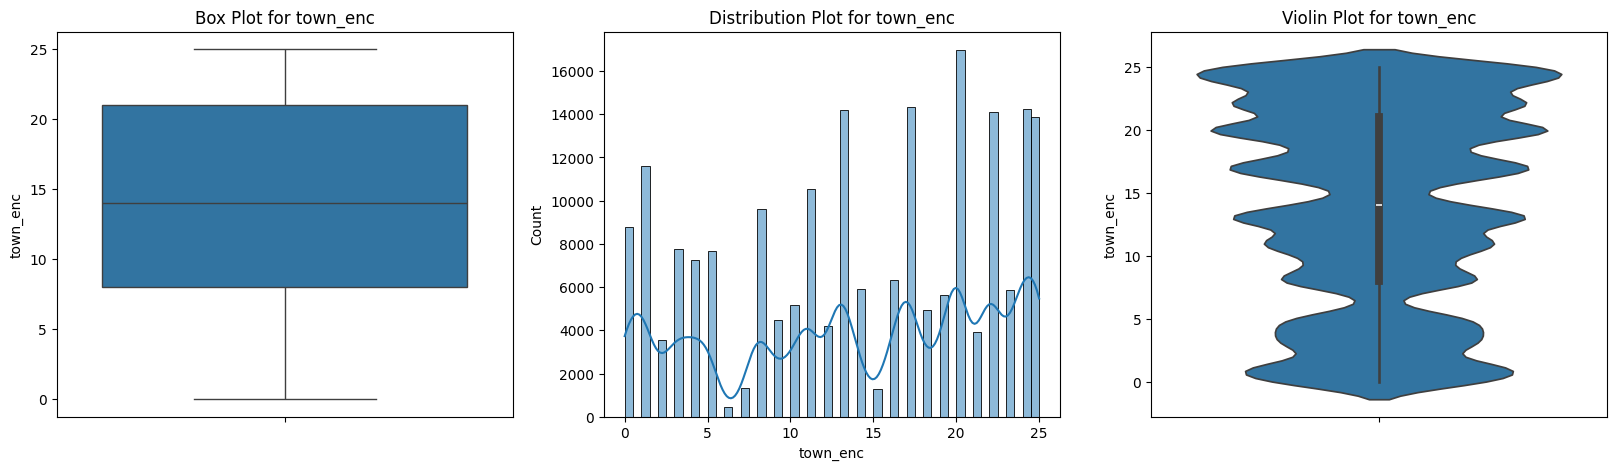

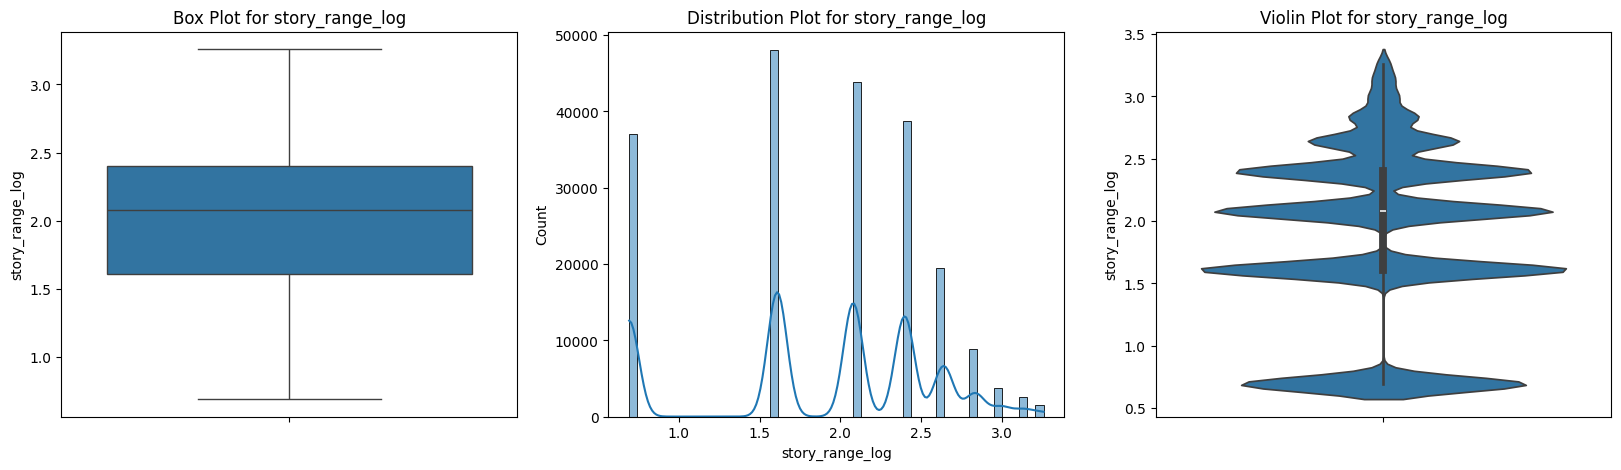

In [30]:
plot(df4, columns)

In [40]:
def regression(x, y, algorithm):
     
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)


    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [32]:
# col = ['floor_area_log', 'lease_commence_date_log', 'resale_price_log', 'town_enc', 'story_range_log']
columns = ['floor_area_log', 'lease_commence_date_log', 'remaining_lease_log', 'flat_type_enc', 'flat_model_enc', 'town_enc', 'story_range_log', 'resale_price_log']
dff = df4[columns]

In [33]:
columns = ['floor_area_log',  'remaining_lease_log', 'flat_type_enc', 'flat_model_enc', 'town_enc', 'story_range_log', 'resale_price_log']
dff = df4[columns]

In [34]:
dff

,floor_area_log,remaining_lease_log,flat_type_enc,flat_model_enc,town_enc,story_range_log,resale_price_log
0,4.094345,4.110874,2.0,5.0,0.0,2.079442,12.449019
1,4.219508,4.025352,2.0,12.0,0.0,0.693147,12.524526
2,4.234107,4.007333,2.0,12.0,0.0,0.693147,12.560244
3,4.219508,3.988984,2.0,12.0,0.0,0.693147,12.577636
4,4.219508,4.007333,2.0,12.0,0.0,2.079442,12.577636
...,...,...,...,...,...,...,...
172576,4.718499,4.532599,4.0,5.0,25.0,1.609438,13.444447
172577,4.727388,4.532599,4.0,5.0,25.0,1.609438,13.470199
172578,4.983607,4.143135,5.0,7.0,25.0,1.609438,13.664688
172579,4.955827,4.127134,5.0,3.0,25.0,2.397895,13.586097


In [35]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_log,204059.0,4.544273,0.251425,3.784190,4.394449,4.543295,4.718499,5.129899
remaining_lease_log,204059.0,4.226281,0.196548,3.713572,4.077537,4.248495,4.369448,4.574711
flat_type_enc,204059.0,3.117652,0.907344,1.000000,2.000000,3.000000,4.000000,5.000000
flat_model_enc,204059.0,8.702875,3.610738,0.000000,5.000000,8.000000,12.000000,19.000000
town_enc,204059.0,13.918063,7.950539,0.000000,8.000000,14.000000,21.000000,25.000000
story_range_log,204059.0,1.902856,0.695684,0.693147,1.609438,2.079442,2.397895,3.258097
resale_price_log,204059.0,13.019589,0.315486,12.043554,12.793859,13.011432,13.240413,13.797347


In [36]:
x = dff.drop('resale_price_log', axis = 1)
y = dff['resale_price_log']
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [37]:
x

array([[-1.78951848, -0.58717258, -1.23178772, -1.02551998, -1.75058524,
         0.25383031],
       [-1.29170177, -1.02229468, -1.23178772,  0.91314648, -1.75058524,
        -1.73888254],
       [-1.23363734, -1.11396973, -1.23178772,  0.91314648, -1.75058524,
        -1.73888254],
       ...,
       [ 1.74738151, -0.42303487,  2.0745745 , -0.47161528,  1.39386319,
        -0.42177099],
       [ 1.63689266, -0.50444185,  2.0745745 , -1.57942469,  1.39386319,
         0.71158795],
       [ 1.74738151, -0.50444185,  2.0745745 , -0.47161528,  1.39386319,
         0.25383031]])

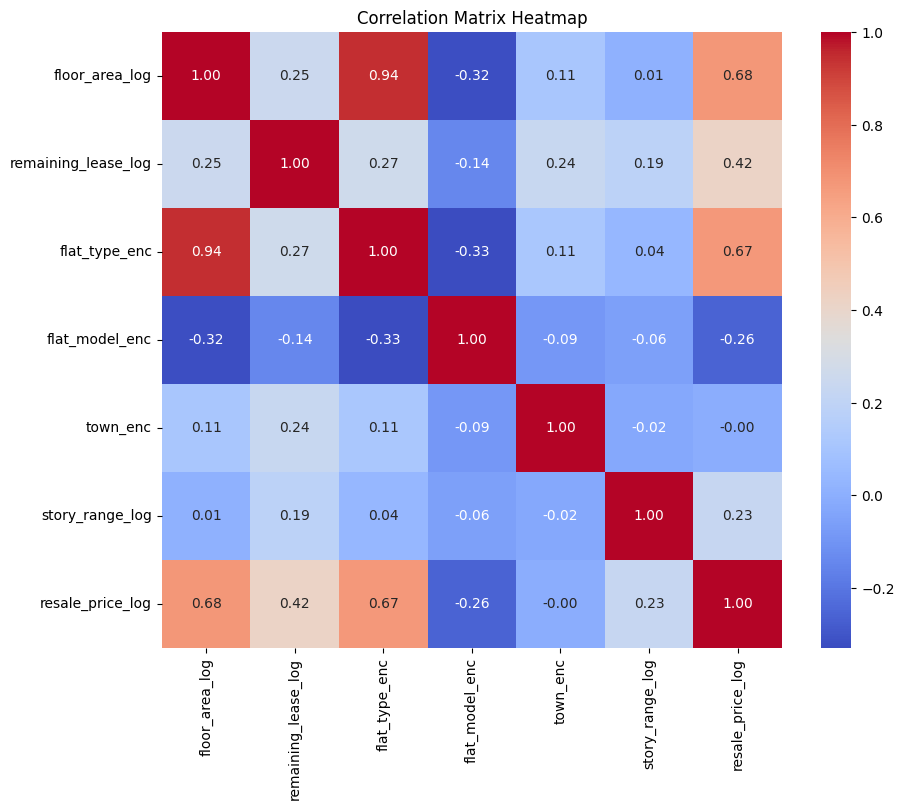

In [38]:
corr = dff.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [41]:
print(regression(x, y, DecisionTreeRegressor))
print(regression(x, y, ExtraTreesRegressor))
print(regression(x, y, RandomForestRegressor))
print(regression(x, y, AdaBoostRegressor))
print(regression(x, y, GradientBoostingRegressor))
print(regression(x, y, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.8853383174427301, 'R2_test': 0.8382908303538831}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.8853383174427301, 'R2_test': 0.8416740463575575}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.8840446046062924, 'R2_test': 0.8466526437187777}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.5849777257243695, 'R2_test': 0.5853930656511834}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7744218123956516, 'R2_test': 0.77125598567258}
{'algorithm': 'XGBRegressor', 'R2_train': 0.8584493192141089, 'R2_test': 0.8518456020940212}


In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb = XGBRegressor()

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best R2 Score:", best_score)
print("R2 Score on Test Set:", r2)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best R2 Score: 0.8571010670170454
R2 Score on Test Set: 0.8554359242243226


In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb = XGBRegressor()

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.8554359242243226,
 'Mean Absolute Error': 0.09611322235406276,
 'Mean Squared Error': 0.014335399569423438,
 'Root Mean Squared Error': 0.11973052897829958}

In [44]:
X_test

array([[-0.04642842, -1.02229468, -0.12966698,  0.91314648, -1.75058524,
         0.25383031],
       [-0.45125308, -0.42303487, -0.12966698,  2.02095589, -1.12169556,
         0.71158795],
       [ 1.74738151, -0.42303487,  2.0745745 , -0.47161528,  1.01652938,
        -0.42177099],
       ...,
       [-1.41043723, -2.13494769, -1.23178772, -1.02551998,  0.51341763,
         0.25383031],
       [ 0.43626531, -0.42303487, -0.12966698, -0.19466293,  1.39386319,
        -0.42177099],
       [-0.08942714,  1.39166585, -0.12966698, -0.19466293, -0.36702793,
         0.71158795]])

In [45]:
test_data = np.array([[4.094345, 7.593878, 2.0, 5.0, 0.0, 2.079442]])

test_data_scaled = scaler.transform(test_data)

y_pred = best_xgb.predict(test_data_scaled)

np.exp(y_pred[0])

589683.44

In [46]:
test_data = np.array([[np.log(60), np.log(61), 2, 5, 0, np.log(8)]])

test_data_scaled = scaler.transform(test_data)

y_pred = best_xgb.predict(test_data_scaled)

np.exp(y_pred[0])

295796.62

In [47]:
np.exp(13.449019)

693161.9881561225

In [48]:
test_data = np.array([[4.094345, 4.110874, 2.0, 5.0, 7.0, 2.079442]])

test_data_scaled = scaler.transform(test_data)

y_pred = best_xgb.predict(test_data_scaled)

np.exp(y_pred[0])

425985.3

In [49]:
with open(r"D:\datascience\Singapore_resale_price_project\regression_model_pkl", 'wb') as f:
    pickle.dump(best_xgb, f)

with open(r"D:\datascience\Singapore_resale_price_project\scaler.pkl", 'wb') as f:
    pickle.dump(scaler, f)

In [50]:
with open(r"D:\datascience\Singapore_resale_price_project\regression_model_pkl", 'rb') as f:
    model = pickle.load(f)

with open(r"D:\datascience\Singapore_resale_price_project\scaler.pkl", 'rb') as f:
    scaler = pickle.load(f)

In [51]:
test1 = np.array([[np.log(55), np.log(63), 2, 5, 7, np.log(5)]])

t1 = scaler.fit_transform(test1)

y_pred1 = model.predict(t1)

print(*np.exp(y_pred1))

347709.9


In [52]:
test_data = np.array([[4.094345, 4.110874, 3.0, 5.0, 7.0, 2.079442]])

test_data_scaled = scaler.transform(test_data)

y_pred = model.predict(test_data_scaled)

np.exp(y_pred[0])

397476.44